In [ ]:
from google.colab import files

# Upload your file
uploaded = files.upload()


Saving preprocessed_earthquake_data.csv to preprocessed_earthquake_data.csv


In [ ]:
!pip install scikit-learn matplotlib


Model Comparison Results
Default Linear Regression -> MSE: 0.9438, R²: 0.0915
Custom Linear Regression  -> MSE: 0.9468, R²: 0.0886


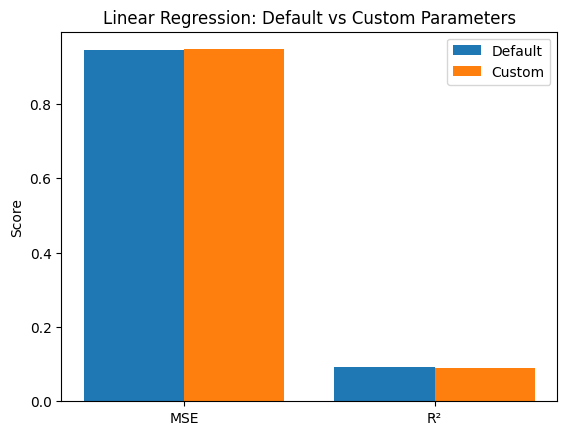

In [ ]:
#Linear Regression Comparison for Earthquake Magnitude Prediction
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# 1.Load Dataset
data = pd.read_csv("preprocessed_earthquake_data.csv")

# Keep only numeric features (drop non-numeric columns like 'Type', 'Source', etc.)
X = data.select_dtypes(include=['float64', 'int64']).drop(columns=['Magnitude'])
y = data['Magnitude']
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
# 2.Default Linear Regression
default_model = LinearRegression()
default_model.fit(X_train, y_train)
y_pred_default = default_model.predict(X_test)
mse_default = mean_squared_error(y_test, y_pred_default)
r2_default = r2_score(y_test, y_pred_default)
# 3.Custom Linear Regression
custom_model = LinearRegression(fit_intercept=True, positive=True)
custom_model.fit(X_train, y_train)
y_pred_custom = custom_model.predict(X_test)
mse_custom = mean_squared_error(y_test, y_pred_custom)
r2_custom = r2_score(y_test, y_pred_custom)
# 4.Print Results
print("Model Comparison Results")
print(f"Default Linear Regression -> MSE: {mse_default:.4f}, R²: {r2_default:.4f}")
print(f"Custom Linear Regression  -> MSE: {mse_custom:.4f}, R²: {r2_custom:.4f}")
# 5.Visualization
metrics = ['MSE', 'R²']
default_scores = [mse_default, r2_default]
custom_scores = [mse_custom, r2_custom]
x = range(len(metrics))
plt.bar(x, default_scores, width=0.4, label="Default", align='center')
plt.bar([p + 0.4 for p in x], custom_scores, width=0.4, label="Custom", align='center')
plt.xticks([p + 0.2 for p in x], metrics)
plt.ylabel("Score")
plt.title("Linear Regression: Default vs Custom Parameters")
plt.legend()
plt.show()
